# Análisis comparativo de variantes de PSO con ejecución paralela

Este notebook tiene como objetivo analizar y comparar los tiempos de ejecución obtenidos por distintas implementaciones del algoritmo de optimización por enjambre de partículas (PSO).

A lo largo del notebook se ejecutarán y evaluarán las siguientes versiones del algoritmo:

- **Secuencial (Clásica)**: `app.py`
- **Multihilo (Threading)**: `app_threading.py`
- **Multiproceso (Multiprocessing)**: `app_multiprocessing.py`
- **Asíncrona (Asyncio)**: `app_asyncio.py`
- **Combinada (Multiproceso + Asyncio)**: `app_multi_async.py`

El análisis se centrará en los **tiempos de ejecución** de cada variante, además de definir sus ventajas y limitaciones, con el objetivo de identificar qué enfoque ofrece una mejor eficiencia en diferentes entornos de ejecución.


## Versión Secuencial

Esta versión ejecuta las optimizaciones de forma secuencial, una tras otra, sin aplicar ningún tipo de paralelismo. Es el punto de partida que utilizamos como referencia para comparar con las versiones paralelas. Se ejecuta el archivo `app.py`, y se mide el tiempo total que tarda en completarse.


In [1]:
import time
import subprocess

print("Ejecutando versión secuencial (app.py)...")
start = time.time()
subprocess.run(["python", "app.py"], cwd="../src")
end = time.time()
sequential_time = round(end - start, 2)
print(f"\nTiempo total de ejecución (Secuencial): {sequential_time:.2f} segundos")


Ejecutando versión secuencial (app.py)...

Tiempo total de ejecución (Secuencial): 438.73 segundos


## Versión con hilos (Threading)

Esta versión paraleliza la ejecución de las combinaciones de parámetros mediante hilos, utilizando `ThreadPoolExecutor`. Aunque los hilos comparten memoria y tienen bajo coste de creación, están limitados por el Global Interpreter Lock (GIL), lo que puede afectar el rendimiento si las tareas son intensivas en CPU, como ocurre en PSO. En este caso concreto, la versión con hilos ha sido incluso más lenta que la secuencial.

In [2]:
print("Ejecutando versión con hilos (app_threading.py)...")
start = time.time()
subprocess.run(["python", "app_threading.py"], cwd="../src")
end = time.time()
threading_time = round(end - start, 2)
print(f"\nTiempo total de ejecución (Threads): {threading_time} segundos")

Ejecutando versión con hilos (app_threading.py)...

Tiempo total de ejecución (Threads): 539.63 segundos


## Versión con procesos (Multiprocessing)

Esta versión paraleliza las combinaciones de parámetros creando procesos independientes mediante `multiprocessing.Process`. Cada proceso ejecuta la optimización completa para una función diferente, permitiendo una verdadera ejecución en paralelo al evitar el GIL. Este método de paralelización cuando las tareas son intensivas en CPU, como es el caso del PSO. Y por lo tanto hay mucha mejora en los tiempos

In [3]:
print("Ejecutando versión multiprocessing (app_multiprocessing.py)...")
start = time.time()
subprocess.run(["python", "app_multiprocessing.py"], cwd="../src")
end = time.time()
multiprocessing_time = round(end - start, 2)
print(f"\nTiempo total de ejecución (Multiprocessing): {multiprocessing_time} segundos")

Ejecutando versión multiprocessing (app_multiprocessing.py)...

Tiempo total de ejecución (Multiprocessing): 277.61 segundos


## Versión asíncrona (Asyncio)

En esta versión se utiliza el modelo de concurrencia asíncrono proporcionado por `asyncio`. Se crean tareas (`coroutines`) para ejecutar las combinaciones de parámetros sin bloquear el hilo principal. Aunque esta técnica es eficiente para operaciones I/O, su impacto en cálculos intensivos en CPU es limitado, ya que no evita el GIL. Aún así mejora significativamente los tiempos.

In [4]:
print("Ejecutando versión asyncio (app_asyncio.py)...")
start = time.time()
subprocess.run(["python", "app_asyncio.py"], cwd="../src")
end = time.time()
asyncio_time = round(end - start, 2)
print(f"\nTiempo total de ejecución (Asyncio): {asyncio_time} segundos")

Ejecutando versión asyncio (app_asyncio.py)...

Tiempo total de ejecución (Asyncio): 427.3 segundos


## Versión combinada: Multiproceso + Asyncio

Esta versión combina la ejecución en paralelo de procesos (uno por función objetivo) mediante `multiprocessing`, con la concurrencia asíncrona (`asyncio`) para ejecutar múltiples combinaciones de parámetros dentro de cada proceso. 

Gracias a esta combinación, se aprovechan los núcleos del procesador (evitando el GIL mediante procesos independientes) y además se ejecutan las tareas concurrentes sin bloquear.

In [7]:
print("Ejecutando versión combinada Multi + Asyncio (app_multi_asyncio.py)...")
start = time.time()
subprocess.run(["python", "app_multi_async.py"], cwd="../src")
end = time.time()
multi_asyncio_time = round(end - start, 2)
print(f"\nTiempo total de ejecución (Multi + Asyncio): {multi_asyncio_time} segundos")

Ejecutando versión combinada Multi + Asyncio (app_multi_asyncio.py)...

Tiempo total de ejecución (Multi + Asyncio): 251.91 segundos


## Análisis comparativo de tiempos

A continuación se muestran los tiempos de ejecución registrados por cada una de las versiones del algoritmo (secuencial, hilos, procesos, asincronía, y combinación de procesos + asincronía). El objetivo es comparar el rendimiento de cada enfoque en función del tiempo total requerido para completar todas las combinaciones de parámetros en cada función objetivo.

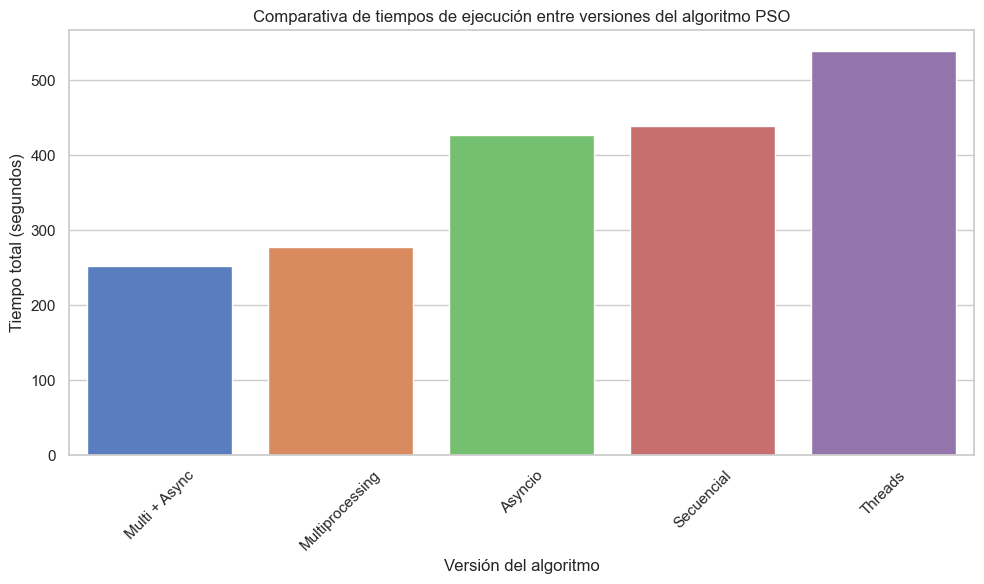

,Versión,Tiempo total (s)
4,Multi + Async,251.91
2,Multiprocessing,277.61
3,Asyncio,427.30
0,Secuencial,438.73
1,Threads,539.63


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear diccionario con los tiempos de ejecución
execution_times = {
    "Secuencial": sequential_time,
    "Threads": threading_time,
    "Multiprocessing": multiprocessing_time,
    "Asyncio": asyncio_time,
    "Multi + Async": multi_asyncio_time
}

# Convertir a DataFrame
df_times = pd.DataFrame(list(execution_times.items()), columns=["Versión", "Tiempo total (s)"])
df_times = df_times.sort_values("Tiempo total (s)")

# Graficar
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=df_times, x="Versión", y="Tiempo total (s)", palette="muted")
plt.title("Comparativa de tiempos de ejecución entre versiones del algoritmo PSO")
plt.ylabel("Tiempo total (segundos)")
plt.xlabel("Versión del algoritmo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_times


## Cálculo del Speedup

El Speedup (aceleración) es una medida del rendimiento de un algoritmo paralelo respecto a su versión secuencial. Se calcula como la relación entre el tiempo que tarda la versión secuencial (`ts`) y el tiempo de una versión paralela (`tp`) para realizar el mismo trabajo:

**S = ts / tp**

- S = 1	La versión paralela tarda lo mismo que la secuencial (no mejora).
- S < 1	La versión paralela es más lenta (mal diseño, sobrecarga o no adecuada para paralelismo).
- S > 1	La versión paralela es más rápida (lo ideal).

A continuación se muestra el Speedup obtenido por cada versión respecto a la versión secuencial:

In [ ]:
speedups = {
    "Threads": round(sequential_time / threading_time, 2),
    "Multiprocessing": round(sequential_time / multiprocessing_time, 2),
    "Asyncio": round(sequential_time / asyncio_time, 2),
    "Multi + Async": round(sequential_time / multi_asyncio_time, 2)
}

df_speedup = pd.DataFrame(list(speedups.items()), columns=["Versión", "Speedup"])
df_speedup = df_speedup.sort_values("Speedup", ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=df_speedup, x="Versión", y="Speedup", palette="crest")
plt.title("Speedup respecto a la versión secuencial")
plt.ylabel("Aceleración (S = ts / tp)")
plt.xlabel("Versión paralela")
plt.tight_layout()
plt.show()

df_speedup

## Conclusiones finales

Después de comparar distintas variantes de implementación del algoritmo PSO, los resultados obtenidos muestran diferencias claras en cuanto a eficiencia de ejecución:

- La versión más rápida fue **Multi + Asyncio**, con un tiempo total de 251.91 segundos, seguida por **Multiprocessing** (277.61 s).
- La versión **Asyncio** también muestra una mejora frente a la secuencial (427.30 s vs. 438.73 s), aunque no tan significativa como las anteriores.
- La versión **Threading** fue la más lenta de todas, con un tiempo total de 539.63 segundos, lo cual es lógico por las limitaciones del Global Interpreter Lock (GIL) en Python.

Durante el diseño, opté por paralelizar las **combinaciones de parámetros** dentro de cada función objetivo, en lugar de ejecutar en paralelo las diferentes funciones (`Sphere`, `Rastrigin`, `Ackley`). Lo hice para poder aprovechar al máximo el paralelismo disponible, ya que la mayor carga computacional se concentra en la evaluación repetida de configuraciones.

Finalmente, el enfoque combinado de process + async fue la que demostró la mayor eficiencia para este problema, al aprovechar los núcleos del procesador con `multiprocessing` y, dentro de cada proceso, coordinar múltiples ejecuciones concurrentes con `asyncio`.

Este análisis de tiempos demuestra que, dependiendo del tipo de problema, elegir bien cómo paralelizar puede marcar una gran diferencia. En este caso, al ser un problema muy intensivo en CPU, las soluciones que usaban procesos han sido las más efectivas.